# World's Best Restaurants

This list is started in 2002, which is an important annual recognition that highlights the best dining experiences around the world. This list is created through votes from over 1000 culinary experts from 27 regions that showcases not only the top restaurants but also the latest trends in food and dining. By looking at this dataset, we can learn about various aspects of the restaurant industry, and what are the famous places to eat at. This report will analyze these trends using statistical methods and visual representations of data from the World's 50 Best Restaurants from 2002 to 2023.

You can find the about it in this link: https://www.theworlds50best.com/

In [186]:
# Importing the necessary libraries
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gp
from shapely.geometry import Point, Polygon
import random
import plotly.graph_objects as pgo
import plotly.express as px
import geopandas
import geodatasets
import folium
from folium.plugins import MarkerCluster
import warnings
import warnings
from cryptography.utils import CryptographyDeprecationWarning
warnings.filterwarnings("ignore", category=CryptographyDeprecationWarning)

In [188]:
df_w50 = pd.read_csv('WorldsBestRestaurants.csv', index_col='year')
df_w50

,rank,restaurant,location,country,lat,lng
year,,,,,,
2002,1,El Bulli,Roses,Spain,42.263949,3.179553
2002,2,Restaurant Gordon Ramsay,London,United Kingdom,51.507218,-0.127586
2002,3,The French Laundry,Yountville,United States,38.401578,-122.360810
2002,4,Rockpool,Sydney,Australia,-33.868820,151.209295
2002,5,Spoon des Iles,Ile Maurice,Mauritius,-20.348404,57.552152
...,...,...,...,...,...,...
2023,46,Orfali Bros Bistro,Dubai,United Arab Emirates,25.204849,55.270783
2023,47,Mayta,Lima,Peru,-12.046689,-77.043088
2023,48,La Grenouillère,La Madelaine-sous-Montreuil,France,50.466809,1.748056


# Statistical Overview of the dataset

In [191]:
df_w50.describe()

,rank,lat,lng
count,1050.000000,1050.000000,1050.000000
mean,25.490476,35.231239,0.070343
std,14.432130,24.690886,61.607445
min,1.000000,-38.336369,-122.870051
25%,13.000000,35.824923,-3.737738
50%,25.000000,43.318237,2.351377
75%,38.000000,48.857548,12.568337
max,50.000000,63.843390,151.209295


The dataset have latitudes and longitudes which are significant numerical values that is needed to know about the restaurants geographical distributions. The longitudes has major wideness in the data by looking at the standard deviation. 

In [194]:
df_w50_num = df_w50[['rank', 'lat', 'lng']]
df_w50_num.agg(['mean', 'median', 'std', 'skew', 'kurtosis'])

,rank,lat,lng
mean,25.490476,35.231239,0.070343
median,25.000000,43.318237,2.351377
std,14.432130,24.690886,61.607445
skew,0.001616,-1.821532,0.452679
kurtosis,-1.198598,2.219872,0.559012


* The mean and median (25.49 and 25.00) of the rank values are close, which indicates a relatively symmetric distribution of restaurant rankings.
* In the latitudes and longitudes the differences are higher than what's in the rank, showing that these coordinates has skewed distibution, where latitude is negatively skewed and longitude is positively skewed.

In [197]:
corr_df = df_w50_num.corr()
corr_df

,rank,lat,lng
rank,1.000000,-0.054543,0.057716
lat,-0.054543,1.000000,-0.135169
lng,0.057716,-0.135169,1.000000


In [199]:
def corr_matrix():
    '''
    Creates a plot for correlation matrix 
    '''
    fig = pgo.Figure(data=pgo.Heatmap(x=corr_df.columns, y=corr_df.index, z=corr_df.values, colorscale='RdBu', zmin=-1, zmax=1,
                                      colorbar=dict(title='Correlation')))
    
    fig.update_layout(title='Correlation Matrix Heatmap', xaxis_title='Variables', yaxis_title='Variables', width=600, height=500)
    
    for i in range(len(corr_df.index)):
        for j in range(len(corr_df.columns)):
            fig.add_annotation(x=corr_df.columns[j], y=corr_df.index[i], text=str(round(corr_df.iloc[i, j], 3)),
                showarrow=False, font=dict(color='black' if abs(corr_df.iloc[i, j]) < 0.5 else 'white'))
    fig.show()

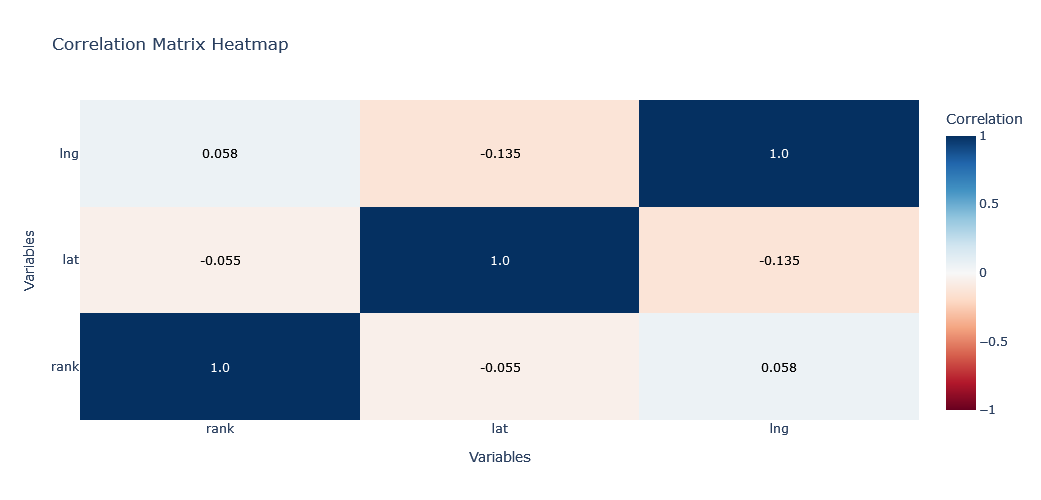

In [201]:
corr_matrix()

# Top 10 restaurants for almost two decades

To know the best 10 out of all the years, I'm going to short down the list from 50 to 5 for each year. So it will be easy to know what's the top 20 out of the new list

In [205]:
top_five = df_w50.groupby(df_w50.index).head(5)
top_five

,rank,restaurant,location,country,lat,lng
year,,,,,,
2002,1,El Bulli,Roses,Spain,42.263949,3.179553
2002,2,Restaurant Gordon Ramsay,London,United Kingdom,51.507218,-0.127586
2002,3,The French Laundry,Yountville,United States,38.401578,-122.360810
2002,4,Rockpool,Sydney,Australia,-33.868820,151.209295
2002,5,Spoon des Iles,Ile Maurice,Mauritius,-20.348404,57.552152
...,...,...,...,...,...,...
2023,1,Central,Lima,Peru,-12.046689,-77.043088
2023,2,Disfrutar,Barcelona,Spain,41.387397,2.168568
2023,3,Diverxo,Madrid,Spain,40.416728,-3.703291


In [207]:
# using value_counts() to see if any restaurants came in top 5 for different years
res_repeat = top_five.restaurant.value_counts()
res_repeat

restaurant
El Celler de Can Roca                       10
Noma                                        10
El Bulli                                     9
The Fat Duck                                 8
Osteria Francescana                          8
The French Laundry                           7
Eleven Madison Park                          6
Mugaritz                                     6
Central                                      5
Pierre Gagnaire                              4
Tetsuya's                                    3
Restaurant Gordon Ramsay                     3
Disfrutar                                    3
Geranium                                     3
Asador Etxebarri                             3
Mirazur                                      3
Gaggan                                       2
Diverxo                                      2
Central                                      1
Pujol                                        1
Le Louis XV                                  1
Di

In [209]:
# Now we can select the top 10 from the new list
top_10 = res_repeat.head(10)
top_10_df = pd.DataFrame({'Restaurant':top_10.index, 'Count':top_10.values})
top_10_df.set_index('Restaurant', inplace=True)
top_10_df

,Count
Restaurant,
El Celler de Can Roca,10
Noma,10
El Bulli,9
The Fat Duck,8
Osteria Francescana,8
The French Laundry,7
Eleven Madison Park,6
Mugaritz,6
Central,5


For more understanding, let's make a barplot

In [212]:
def top_10_restaurants(restaurants, count): 
    '''
    Creates a bar plot which shows the top 10 restaurants that made it to top 5 for almost two decades
    '''
    fig = pgo.Figure(data=[pgo.Bar(x=restaurants, y=count, marker_color=count,
                                   text=count, textposition='auto', hoverinfo='text+x')])
    
    fig.update_layout(
        title='Top 10 Restaurants by Times Made it to Top 5',
        xaxis_title='Restaurant',
        yaxis_title='Times made it to Top 5',
        xaxis_tickangle=-80,
        height=600,
        width=900,
        coloraxis_showscale=False
    )
    fig.show()

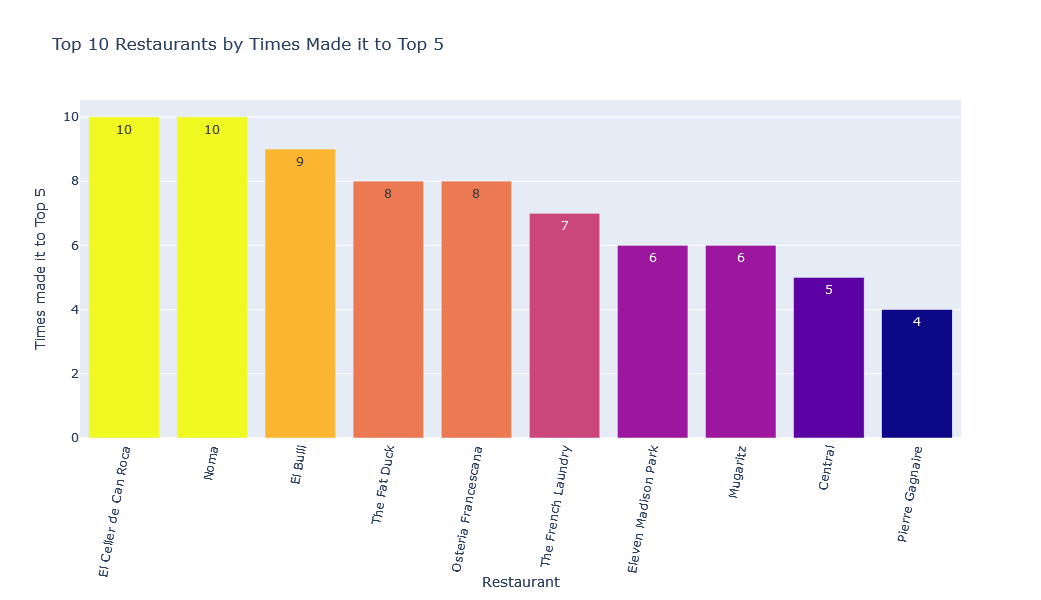

In [214]:
top_10_restaurants(top_10_df.index, top_10_df.Count)

# Rising star from zero to hero

Looking at the top 10 restaurants, and the times they made it to top 5, we can say that they're the ones being consistant towards their service and culinary excellence. But, to achieve this recognition, you got to start from somewhere, like from the scratch and all the way upto to the top rankings. Let's analyze the data to see the rising star of this list of restaurants.

In [218]:
df_w50

,rank,restaurant,location,country,lat,lng
year,,,,,,
2002,1,El Bulli,Roses,Spain,42.263949,3.179553
2002,2,Restaurant Gordon Ramsay,London,United Kingdom,51.507218,-0.127586
2002,3,The French Laundry,Yountville,United States,38.401578,-122.360810
2002,4,Rockpool,Sydney,Australia,-33.868820,151.209295
2002,5,Spoon des Iles,Ile Maurice,Mauritius,-20.348404,57.552152
...,...,...,...,...,...,...
2023,46,Orfali Bros Bistro,Dubai,United Arab Emirates,25.204849,55.270783
2023,47,Mayta,Lima,Peru,-12.046689,-77.043088
2023,48,La Grenouillère,La Madelaine-sous-Montreuil,France,50.466809,1.748056


In [220]:
df_w50['rank_diff'] = df_w50.groupby('restaurant')['rank'].diff()
df_w50

,rank,restaurant,location,country,lat,lng,rank_diff
year,,,,,,,
2002,1,El Bulli,Roses,Spain,42.263949,3.179553,NaN
2002,2,Restaurant Gordon Ramsay,London,United Kingdom,51.507218,-0.127586,NaN
2002,3,The French Laundry,Yountville,United States,38.401578,-122.360810,NaN
2002,4,Rockpool,Sydney,Australia,-33.868820,151.209295,NaN
2002,5,Spoon des Iles,Ile Maurice,Mauritius,-20.348404,57.552152,NaN
...,...,...,...,...,...,...,...
2023,46,Orfali Bros Bistro,Dubai,United Arab Emirates,25.204849,55.270783,NaN
2023,47,Mayta,Lima,Peru,-12.046689,-77.043088,15.0
2023,48,La Grenouillère,La Madelaine-sous-Montreuil,France,50.466809,1.748056,NaN


In [222]:
rising_star = df_w50.groupby('restaurant')['rank_diff'].sum().idxmin()
rising_star_data = df_w50[df_w50['restaurant'] == rising_star]
rising_star_data

,rank,restaurant,location,country,lat,lng,rank_diff
year,,,,,,,
2013,50,Central,Lima,Peru,-12.046689,-77.043088,NaN
2014,15,Central,Lima,Peru,-12.046689,-77.043088,-35.0
2015,4,Central,Lima,Peru,-12.046689,-77.043088,-11.0
2016,4,Central,Lima,Peru,-12.046689,-77.043088,0.0
2017,5,Central,Lima,Peru,-12.046689,-77.043088,1.0
2018,6,Central,Lima,Peru,-12.046689,-77.043088,1.0
2019,6,Central,Lima,Peru,-12.046689,-77.043088,0.0
2021,4,Central,Lima,Peru,-12.046689,-77.043088,-2.0
2022,2,Central,Lima,Peru,-12.046689,-77.043088,-2.0


### Since we know **Central** restaurant is our rising star
Now let's create a line plot to have more understanding how our rising star rose through the ranks

In [225]:
def rising_star(rising_star_data, restaurant_name):
    '''
    Creates a line plot that shows how the Central Restaurant climbs the rank and made it to the top
    '''
    fig = px.line(rising_star_data, x=rising_star_data.index, y='rank', markers=True,
                  title=f'Ranking Trend for {restaurant_name}',
                  labels={'year':'Year', 'rank':'Rank'},
                  width=800, height=500)
    
    fig.update_layout(xaxis_title_font=dict(size=15),
                      yaxis_title_font=dict(size=15),
                      yaxis_autorange='reversed',
                      xaxis=dict(tickmode='linear'),
                      yaxis_gridcolor='lightgrey',
                      xaxis_gridcolor='lightgrey')
    fig.show()

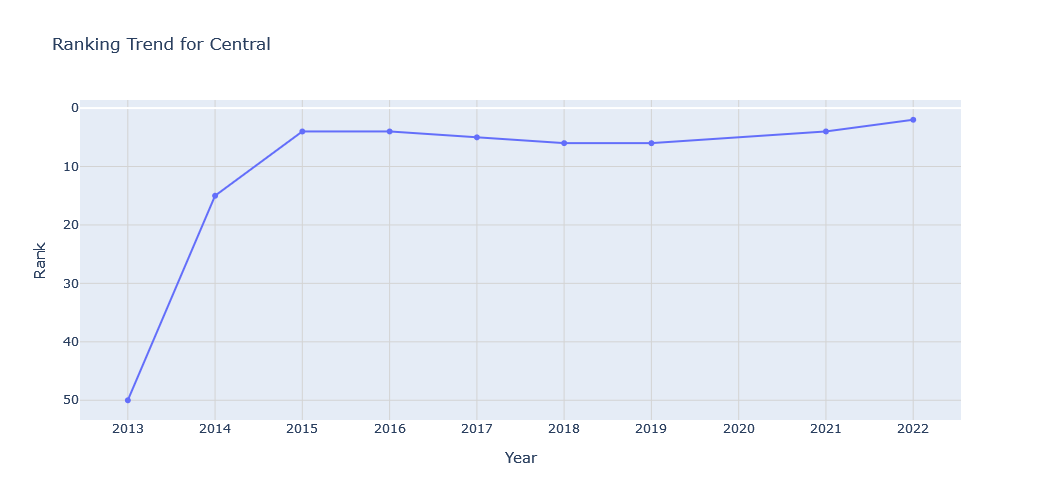

In [227]:
rising_star(rising_star_data, 'Central')

# Geographical distribution of the Top 10 restaurants

We already know the top 10 restaurants, so let's make a KDE plot for the location of the restaurants.

In [231]:
df_top_10 = top_10.reset_index()
df_top_10.columns = ['restaurant', 'count']
df_top_10

,restaurant,count
0,El Celler de Can Roca,10
1,Noma,10
2,El Bulli,9
3,The Fat Duck,8
4,Osteria Francescana,8
5,The French Laundry,7
6,Eleven Madison Park,6
7,Mugaritz,6
8,Central,5
9,Pierre Gagnaire,4


In [233]:
latest_entries = df_w50.sort_values('year', ascending=False).drop_duplicates('restaurant')

In [235]:
df_top10 = pd.merge(df_top_10, latest_entries, on='restaurant', how='left')
df_top10 = df_top10.set_index('restaurant')
df_top10

,count,rank,location,country,lat,lng,rank_diff
restaurant,,,,,,,
El Celler de Can Roca,10,2,Girona,Spain,41.979400,2.821426,-1.0
Noma,10,1,Copenhagen,Denmark,55.676097,12.568337,-1.0
El Bulli,9,2,Roses,Spain,42.263949,3.179553,1.0
The Fat Duck,8,47,Bray,United Kingdom,51.507725,-0.700588,14.0
Osteria Francescana,8,1,Modena,Italy,44.647128,10.925227,-1.0
The French Laundry,7,50,Yountville,United States,38.401578,-122.360810,6.0
Eleven Madison Park,6,4,New York,United States,40.712775,-74.005973,3.0
Mugaritz,6,31,San Sebastian,Spain,43.318237,-1.981705,10.0
Central,5,2,Lima,Peru,-12.046689,-77.043088,-2.0


In [240]:
df_w50['lat_rad'] = np.radians(df_w50['lat'])
df_w50['lng_rad'] = np.radians(df_w50['lng'])

# Calculating mean and median for latitude
lat_mean = df_w50['lat_rad'].mean()
lat_median = df_w50['lat_rad'].median()

# Calculating mean and median for longitude
lng_mean = df_w50['lng_rad'].mean()
lng_median = df_w50['lng_rad'].median()

print(f"Latitude - Mean: {np.degrees(lat_mean):.4f}°, Median: {np.degrees(lat_median):.4f}°")
print(f"Longitude - Mean: {np.degrees(lng_mean):.4f}°, Median: {np.degrees(lng_median):.4f}°")

Latitude - Mean: 35.2312°, Median: 43.3182°
Longitude - Mean: 0.0703°, Median: 2.3514°


In [283]:
def geo_density(lat, lng):
    '''
    Creates a plot to show the Kernel Density Estimation of the coordinates
    '''
    plt.figure(dpi=144)
    sns.kdeplot(data=df_w50, x=lng, y=lat, cmap='YlOrRd', fill=True, cbar=True)
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], ['-π', '-π/2', '0', 'π/2', 'π'])
    plt.yticks([-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2], ['-π/2', '-π/4', '0', 'π/4', 'π/2'])
    
    plt.annotate(f"Lat Mean: {lat_mean:.2f}\nLat Median: {lat_median:.2f}", 
                 xy=(0.05, 0.95), xycoords='axes fraction', 
                 fontsize=8, ha='left', va='top')
    plt.annotate(f"Lng Mean: {lng_mean:.2f}\nLng Median: {lng_median:.2f}", 
                 xy=(0.95, 0.05), xycoords='axes fraction', 
                 fontsize=8, ha='right', va='bottom')

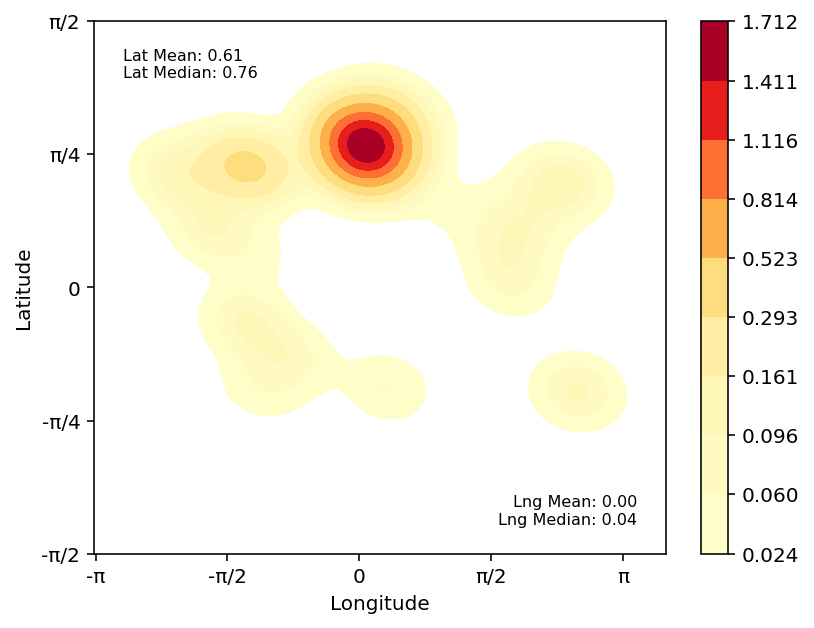

In [244]:
geo_density(df_w50.lat_rad, df_w50.lng_rad)

The density map above shows the statistics that interpretes the geographical focus of this dataset. So let's make a geospatial map to see where these Top 10 restaurants are located.

In [246]:
df_top10['rank'] = range(1, len(df_top10) + 1)
df_top10

,count,rank,location,country,lat,lng,rank_diff
restaurant,,,,,,,
El Celler de Can Roca,10,1,Girona,Spain,41.979400,2.821426,-1.0
Noma,10,2,Copenhagen,Denmark,55.676097,12.568337,-1.0
El Bulli,9,3,Roses,Spain,42.263949,3.179553,1.0
The Fat Duck,8,4,Bray,United Kingdom,51.507725,-0.700588,14.0
Osteria Francescana,8,5,Modena,Italy,44.647128,10.925227,-1.0
The French Laundry,7,6,Yountville,United States,38.401578,-122.360810,6.0
Eleven Madison Park,6,7,New York,United States,40.712775,-74.005973,3.0
Mugaritz,6,8,San Sebastian,Spain,43.318237,-1.981705,10.0
Central,5,9,Lima,Peru,-12.046689,-77.043088,-2.0


In [255]:
def geo_spatial_plot(ref1, ref2):
    mapp = folium.Map(location=(ref1, ref2))
    marker_cluster = MarkerCluster().add_to(mapp)
    for i, j in df_top10.iterrows():
        folium.Marker(
            location=[j['lat'], j['lng']],
            popup=f"{i}<br>Rank: {j['rank']}<br>Location: {j['location']}, {j['country']}",
            tooltip=i
        ).add_to(mapp)
    return mapp

In [257]:
geo_spatial_plot(df_top10.loc['El Celler de Can Roca', 'lat'], df_top10.loc['El Celler de Can Roca', 'lng'])

This analysis made it possible to understand which places are marked as **the best restaurants** all around the world. Having trip plans as foodie, may not be possible for 50 restaurants that may or may not be the best everytime. But analytically, going to these top 10 restaurants seems plausible. 

# Summary

* After the first look at the dataset, it was an hassle to decide which are the best. So cutting it down to top 5 for every year instead of top 50, made it more easier to have an understanding about the dataset.
* Next, I made a bar plot to visually present, which restaurants made it to top 5 multiple times. So, according to the count I can decide the top 10 out of it.
* Every story has someone who rose from **zero to hero**. So, I calculated the rank difference of the restaurants in this dataset, so that I can find out which restaurant has a lowest difference in sum. **Central** took the title of **rising star** in this dataset. I made a line plot to showcase it's victory to the top.
* There's so many restaurants in this dataset that are located all around the world. To analyze it's geographical focus, I calculated the mean and median for the latitudes and longitudes of every restaurants. And to visually represent, if any region has majorly concentrated range of values, I made a Kernel Density Estimation plot. Some areas are having high density. So, to check whether how top 10 restaurants are geographically located, I plotted a geospatial graph.
* It clearly shows that **Northwestern Region** has the best restaurants in the world. 

# Git Repository Link

https://github.com/Thivas12/Statistical-analysis-on-the-World-s-Top-Restaurants